# Data Science for Beginners - Part 2
Now that you have your environment running, we can do some stuff. We'll use this dataset:

[*2015 Flight Delays and Cancellations* provided by the U.S. Department of Transportation](https://www.kaggle.com/usdot/flight-delays). 

It is best to follow along with a running Jupyter environment - this can be local or on Azure Notebooks. It is also best to be running this on a cloned repo or library so that you'll also have the data accessible. 

**Note:** if on Azure notebooks - you would probably need to use a subset of the data because `flights.csv` may be too large for Azure to handle. In *Section 2*, run the other cell.

# 1. Import Modules and Data

In [1]:
%matplotlib inline

import pandas as pd # Panel data processing
import numpy as np # Library for numerical data
import matplotlib.pyplot as plt # Plots
import matplotlib 

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


# 2. Read Data from File

**We host this data on an S3 bucket, so it can take a while to download. You can choose to just download the file yourself and change the path.**

First we load our csv with `pd.read_csv()`, which is a very good csv parser. This returns a pandas `DataFrame` object, of which dimensions are accessible with `.shape`. 

`.head()` gives us a preview of our data- by showing the first 5 rows. 

In jupyter notebook, any variable called on the last line is automatically printed, so there's no need to call `print(flights.head())`.

### FOR AZURE NOTEBOOKS

In [6]:
%%time
flights = pd.read_csv('https://s3.amazonaws.com/vandyhacks/datascience/flights/flights_sample.csv') # Load the csv from our s3 bucket
# 80% sample of original data

print("Dimensions: {r} rows, {c} cols".format(r=flights.shape[0], c=flights.shape[1])) 
flights.head()

Dimensions: 1135160 rows, 32 cols
CPU times: user 19 s, sys: 8.61 s, total: 27.6 s
Wall time: 52.6 s


### FOR LOCAL/Other

In [6]:
flights = pd.read_csv('https://s3.amazonaws.com/vandyhacks/datascience/flights/flights.csv') # Load the csv from our s3 bucket
# This might take a while since the file is about 500mb big

print("Dimensions: {r} rows, {c} cols".format(r=flights.shape[0], c=flights.shape[1])) 
flights.head()

C:\Users\Kenneth\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Dimensions: 5819079 rows, 31 cols


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## ALL notebooks run from here down

In [23]:
airlines = pd.read_csv('https://s3.amazonaws.com/vandyhacks/datascience/flights/airlines.csv')
airlines.head() 

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


# 3. Remove Columns with Empty Values

In [12]:
flights = flights.dropna(axis=1, thresh= 0.8 * flights.shape[0]) # Drop any columns containing NaN, but keep columns with at least 80% non-NA values

print("Dimensions: {r} rows, {c} cols".format(r=flights.shape[0], c=flights.shape[1]))
flights.head()

Dimensions: 5819079 rows, 25 cols


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0


# 4. Add 'DATE' and 'TOTAL_DELAY' Columns

In pandas, you can simply make a new column with assignment. For example:

```
df['a'] = df['b'] + df['c']
```
For every row of a DataFrame `df`, the value in col 'a' is the sum of values in columns 'b' and 'c' on the same row.

Also, you can access columns of a DataFrame like such. Autocomplete with tab works pretty well in Jupyter.

A `DateTime` object is another pandas object for holding date-time information. The `to_datetime` function is pretty flexible in converting Series, strings, and other items into DateTime objects.


The next piece of code is pretty nutty (and you don't need to know it by heart to do most things):

```flights.groupby('DATE').mean()``` returns a new DataFrame. This aggregates the entire `flights` DataFrame column-wise by taking the mean of each column grouped by matching values in the 'DATE' column. The grouped 'DATE' column is now the new index.

```pd.DataFrame(flights.groupby('DATE').mean(), columns=['DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'TOTAL_DELAY'])``` creates a DataFrame by basically subsetting the columns we specify. We can also do this by subsetting with a list:

```new_df = flights.groupby('DATE').mean()[['DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'TOTAL_DELAY']]``` 

In [8]:
flights['DATE'] = pd.to_datetime(flights[['MONTH', 'DAY','YEAR']]) # We use a special case of to_datetime(): assemble the datetime by inferring from a DataFrame subset

flights['TOTAL_DELAY'] = flights['DEPARTURE_DELAY'].astype(float) + flights['ARRIVAL_DELAY'].astype(float) # Get total delay of flights

avg_delay_date = pd.DataFrame(flights.groupby('DATE').mean(), columns=['DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'TOTAL_DELAY']) #average delay per day

avg_delay_date.sort_values(by='TOTAL_DELAY', ascending=False).head(10) # Show dates with highest average total delay

,DEPARTURE_DELAY,ARRIVAL_DELAY,TOTAL_DELAY
DATE,,,
2015-01-04,32.209939,32.294174,64.440781
2015-12-27,31.856808,29.078671,60.750085
2015-12-29,32.874016,27.213886,59.780191
2015-12-30,30.273139,25.748942,55.999023
2015-12-28,29.927861,25.419762,55.174180
2015-03-01,26.048387,26.599851,52.178798
2015-08-20,26.551154,24.786813,51.159812
2015-01-03,24.481177,24.920537,49.365325
2015-07-18,24.548688,22.474601,47.014877


We can make a simple plot of our results to see which dates have had the highest average delay. We can play around with this by grouping by month to look at this a different way. The New-Years flights especially seem to be busy.

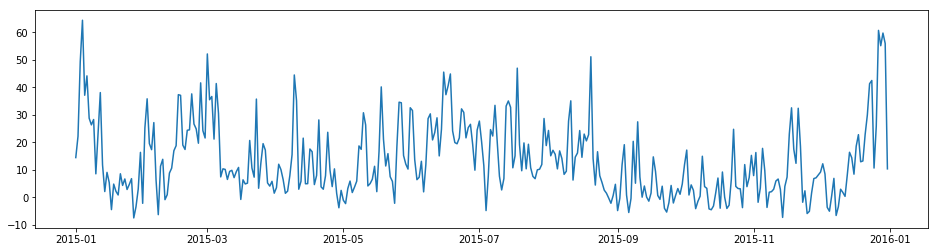

In [9]:
plt.figure(figsize=(16,4)) # Specifies figure size (optional line)
plt.plot(avg_delay_date.index, avg_delay_date['TOTAL_DELAY']) # Plotting by total_delay over dates 

We can repeat our above steps for airlines, so we can see how delays differ by airline.

In [15]:
avg_delay_airline = pd.DataFrame(flights.groupby('AIRLINE').mean(), columns=['DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'TOTAL_DELAY']) #average delay per airline
avg_delay_airline.sort_values(by=['TOTAL_DELAY'], ascending=False).head(10)

,DEPARTURE_DELAY,ARRIVAL_DELAY,TOTAL_DELAY
AIRLINE,,,
NK,15.944766,14.471800,30.354900
F9,13.350858,12.504706,25.808059
UA,14.435441,5.431594,19.764650
B6,11.514353,6.677861,18.120328
MQ,10.125188,6.457873,16.425060
EV,8.715934,6.585379,15.200976
WN,10.581986,4.374964,14.892147
VX,9.022595,4.737706,13.731191
OO,7.801104,5.845652,13.581735


# 5. Add Graphs
Here we can make graphs of our data to get some real insights. We may be curious if a certain airline is more prone to delays, and if delays are significantly seasonal. Are delays correlated with other factors? Visualization can help.

Text(0.5,1,'Total Delays per Month')

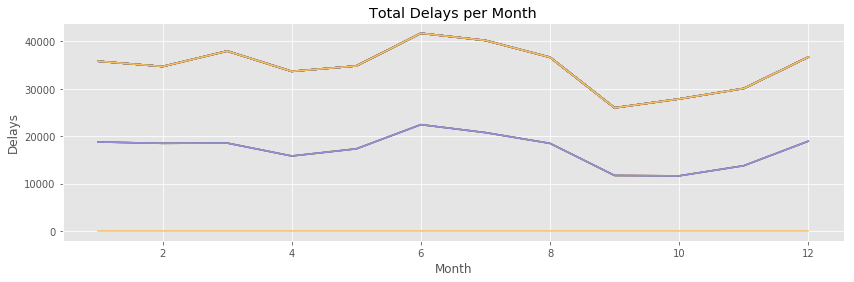

In [10]:
flights_delayed = flights[flights['TOTAL_DELAY'] > 0] # Filter using a boolean indexer 

matplotlib.style.use('ggplot') # Optional line
plt.figure(figsize=(14,4))
plt.plot(flights_delayed.groupby('MONTH').count()) # Group by COUNT, i.e. # number of flights each month that were delayed at all
plt.xlabel('Month', size = 12)
plt.ylabel('Delays', size = 12)
plt.title('Total Delays per Month')
#plt.show()   Show the graph (but if it's the last graph in a cell Jupyter automatically outputs it)

Text(0.5,1,'Average Delay by Airline')

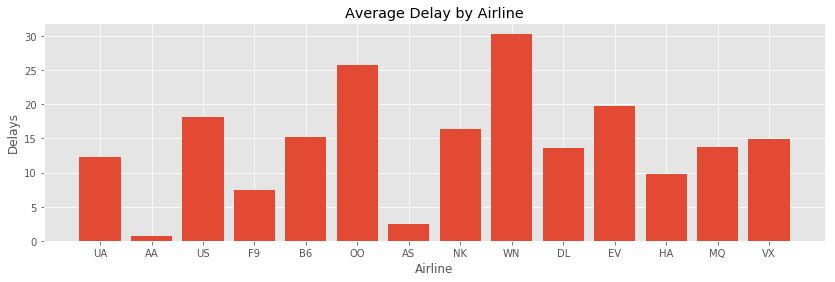

In [30]:
bins = np.arange(airlines.shape[0])

plt.figure(figsize=(14,4))
plt.bar(bins, avg_delay_airline['TOTAL_DELAY'].values)
plt.xlabel('Airline')
plt.xticks(bins, airlines['IATA_CODE'])
plt.ylabel('Delays')
plt.title('Average Delay by Airline')

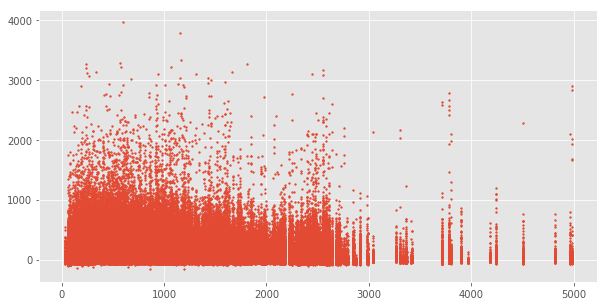

In [34]:
# Is delay time correlated with distance of the flight?
plt.figure(figsize=(10,5))
plt.scatter(flights['DISTANCE'], flights['TOTAL_DELAY'], s=3) # x= distance, y= delay

# 6. Prediction with ML
** Objective**: Let's say you're at a hackathon and you're fishing around for a model that can help you *predict how delayed a flight will be*. Let's do the following:

1. **Make some new features by encoding categorical data**
2. **Throw (almost) all our features at a classifier** (This is generally poor practice - visualization helps you pick which features can help your model make sense)
3. **See how performance is**
4. **Rinse and repeat steps 1-3 if not satisfactory **

In [12]:
avg_delay_day = pd.DataFrame(flights.groupby('MONTH').mean(), columns=['DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'TOTAL_DELAY']) #average delay per day

avg_delay_day.sort_values(by='TOTAL_DELAY', ascending=False).head(10) # Show dates with highest average total delay

,DEPARTURE_DELAY,ARRIVAL_DELAY,TOTAL_DELAY
MONTH,,,
6,14.008219,9.609073,23.527035
2,11.906979,8.311631,20.130251
12,11.838949,6.196714,17.948652
7,11.266393,6.264644,17.477013
1,9.749874,5.719882,15.393961
8,9.893336,4.615605,14.446203
3,9.615189,4.892524,14.424822
5,9.270193,4.294292,13.487887
4,7.696518,3.089896,10.661046


In [13]:
avg_delay_day.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='MONTH')

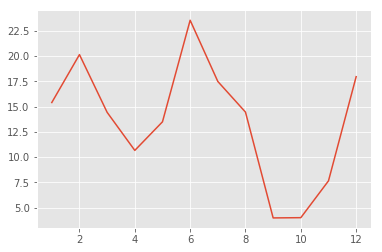

In [14]:
# Plot of average delay for each calendar month
plt.plot(avg_delay_day.index, avg_delay_day['TOTAL_DELAY'])

In [17]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,DATE,TOTAL_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,1448,404.0,4.0,430,408.0,-22.0,0,0,2015-01-01,-33.0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,2330,737.0,4.0,750,741.0,-9.0,0,0,2015-01-01,-17.0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,2296,800.0,11.0,806,811.0,5.0,0,0,2015-01-01,3.0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,2342,748.0,8.0,805,756.0,-9.0,0,0,2015-01-01,-14.0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,1448,254.0,5.0,320,259.0,-21.0,0,0,2015-01-01,-22.0


In [ ]:
flights_full = flights.dropna(axis=0) # only take rows with non NA values
print("Shape of train/test data: ", flights_full.shape)

First we split our data into training and test sets. The `train_test_split` sklearn function is quite useful for this. We can dictate which columns we want to take as features straight from the data we have and specify our target variable 'TOTAL_DELAY'. 

In [33]:
from sklearn.model_selection import train_test_split

# Get some features straight from `flights` and run lin reg on total_delay
# Note that features must be numerical. We can handle categorical data later.
def_features = ['DISTANCE', 'WHEELS_ON', 'SCHEDULED_ARRIVAL', 'TAXI_IN'] # list of column names

trainX, testX, trainY, testY = train_test_split(flights_full[def_features], flights_full['TOTAL_DELAY'], train_size=0.8)

C:\Users\Kenneth\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Next we look at two simple regression models: **Linear Regression** and **Random Forest**
- If we just want a regressor, we only care about prediction results and try to get the best one
- If we want more analysis, models like LinearRegression give clues into how certain factors affect total delay, but others can be black boxes

We then look at an metric of accuracy: $R^2$, of which a perfect regressor will yield a value of 1.0

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# There are many ways to preprocess data, here we can use normalize as a parameter
linreg = LinearRegression(normalize=True)
rf = RandomForestRegressor()

linreg.fit(trainX, trainY)
print("Linear regression train R^2 value: ", linreg.score(trainX, trainY))
print("Linear regression test R^2 value: ", linreg.score(testX, testY))

rf.fit(trainX, trainY)
print("Random forest train R^2 value: ",rf.score(trainX, trainY) )
print("Random forest test R^2 value: ",rf.score(testX, testY) )

Linear regression train R^2 value:  0.015594378841217837
Linear regression test R^2 value:  0.016347282063981394
Random forest train R^2 value:  0.9931182565696827
Random forest test R^2 value:  0.9622835725958522


**More metrics**

Root mean-squared-error is in the same units as the target data, meaning our prediction may be off by around *xx* minutes. 

In [ ]:
from sklearn.metrics import mean_squared_error

print("RMSE: ", np.sqrt(mean_squared_error(testY, res)))

## 6b. More techniques

Something else to consider is that we have many more features - like the month and day of week of the flight. Categorical features can be encoded in different ways to better represent them as numerical data. A popular technique is one-hot encoding. 

There are many other things you can check out to engineer more features. 

In [24]:
from sklearn.preprocessing import OneHotEncoder

# We can encode 
enc = OneHotEncoder()

enc.fit_transform(flights['MONTH'].values.reshape(-1,1)).shape

(5819079, 12)

# ML - going further

Check out this Kaggle kernel of this dataset if you're interested in a more detailed investigation of airline delays and prediction:

https://www.kaggle.com/fabiendaniel/predicting-flight-delays-tutorial


## Hackathon Project Ideas
Guaranteed to win!

### Something something object recognition 
- Start with [MNIST handwritten digit recognition using convolutional neuro nets](https://towardsdatascience.com/a-simple-2d-cnn-for-mnist-digit-recognition-a998dbc1e79a). Use Keras over tensorflow for beginners. 
- More advanced applications of object recognition https://towardsdatascience.com/analyse-a-soccer-game-using-tensorflow-object-detection-and-opencv-e321c230e8f2


### Prediction webapp
- Train a model, pickle it, and load it up on a webapp that can process predictions
- Ex. Fake news classifier